In [2]:
"""
Gaussian Processes regression examples
"""
MPL_AVAILABLE = True
try:
    import matplotlib.pyplot as plt
except ImportError:
    MPL_AVAILABLE = False

import numpy as np
import GPy

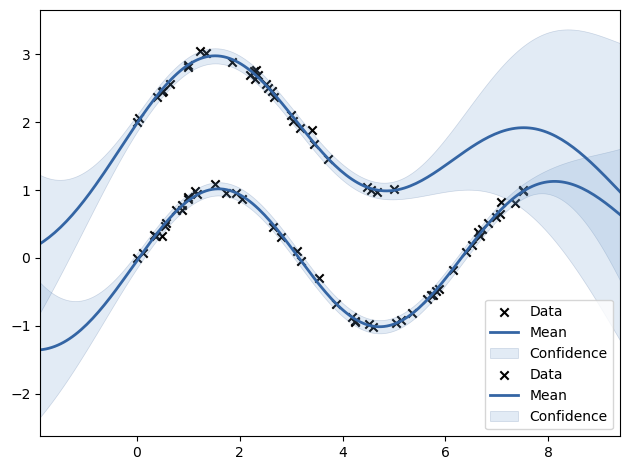

In [4]:
def coregionalization_toy(optimize=True, plot=True):
    """
    A simple demonstration of coregionalization on two sinusoidal functions.
    """
    # build a design matrix with a column of integers indicating the output
    X1 = np.random.rand(50, 1) * 8
    X2 = np.random.rand(30, 1) * 5

    # build a suitable set of observed variables
    Y1 = np.sin(X1) + np.random.randn(*X1.shape) * 0.05
    Y2 = np.sin(X2) + np.random.randn(*X2.shape) * 0.05 + 2.0

    m = GPy.models.GPCoregionalizedRegression(X_list=[X1, X2], Y_list=[Y1, Y2])

    if optimize:
        m.optimize("bfgs", max_iters=100)

    if MPL_AVAILABLE and plot:
        slices = GPy.util.multioutput.get_slices([X1, X2])
        m.plot(
            fixed_inputs=[(1, 0)],
            which_data_rows=slices[0],
            Y_metadata={"output_index": 0},
        )
        m.plot(
            fixed_inputs=[(1, 1)],
            which_data_rows=slices[1],
            Y_metadata={"output_index": 1},
            ax=plt.gca(),
        )
    return m

m = coregionalization_toy()

In [5]:
Y_metadata1 = {'output_index': np.array([[0]])}
xstar = np.random.rand(1, 1).reshape(1,-1)
xs = np.random.rand(1, 2).reshape(1,-1)
m.predict(xs, Y_metadata=Y_metadata1)

(array([[0.35444631]]), array([[0.00243657]]))

In [36]:
m.kern

coreg.,value,constraints,priors
rbf.variance,1.2297435102738905,+ve,
rbf.lengthscale,2.619992891909014,+ve,
B.W,"(2, 1)",,
B.kappa,"(2,)",+ve,


In [32]:
from scipy.special import rel_entr as kl_div

def kl(p, q):
    for i in range(len(p)):
        #print(p[i], q[i])
        print(p[i] * np.log2(p[i]/q[i]))
    return sum(p[i] * np.log2(p[i]/q[i]) for i in range(len(p)))

kl_div([.4, .4, .2], [.4, .3, .3]), kl([.4, .4, .2], [.4, .3, .3])

0.0
0.1660149997115376
-0.11699250014423122


(array([ 0.        ,  0.11507283, -0.08109302]), 0.04902249956730638)

?
[[0.5 0.5]]
2
[0.5 0.5]
(2,)
1


GP_regression.,value,constraints,priors
Gaussian_noise.variance,1.0,+ve,


In [7]:
from GPy.models import GPRegression
import numpy as np
from src.kl import KL
import pytest

X = np.asarray([[.5, .5], [.5, .5]])
Y = np.asarray([[.2], [.3]])

# I think input_dim here specifies the number of 
# components in X. This test verifies that 
# there is no error if there are 3 test points of dim 2
kernel=KL(input_dim=2)
GPRegression(kernel=kernel, X=X, Y=Y)

GP_regression.,value,constraints,priors
Gaussian_noise.variance,1.0,+ve,


In [6]:
import pods
data = pods.datasets.olympic_marathon_men()

ModuleNotFoundError: No module named 'pods'